Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [22]:
import requests
import os
import re
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [23]:
df_marseille_data = pd.read_csv("../data/df_marseille_stations.csv")
df_pois_data = pd.read_csv("../data/df_yelp_data.csv")
df_joined_data = pd.merge(df_marseille_data, df_pois_data, how="outer")

In [24]:
df_joined_data.to_csv("../data/df_joined_data", index=False)

print(df_joined_data[:10])

   Unnamed: 0                   name   Latitude  Longitude  Empty Slots  \
0           0     Cours Jean Ballard  43.293009   5.374584          NaN   
1           1        Allées Gambetta  43.299028   5.381509          NaN   
2           2     Réformés Canebière  43.299717   5.384845          NaN   
3           3            Coutellerie  43.296800   5.372910          NaN   
4           4    Canebiere - Beauvau  43.295279   5.375048          NaN   
5           5      Colbert Ste Barbe  43.299243   5.374807          NaN   
6           6          Centre Bourse  43.296935   5.376544          NaN   
7           7  Saint-Ferréol - Davso  43.293600   5.378350          NaN   
8           8    Flammarion - Isoard  43.304278   5.388868          NaN   
9           9     Longchamp - Grobet  43.302992   5.392136          NaN   

   free_bikes                    timestamp   Id Name Category  Distance  \
0         0.0  2023-11-07T13:15:27.389000Z  NaN  NaN      NaN       NaN   
1         0.0  2023-11-0

In [25]:
df_joined_data.head()


,Unnamed: 0,name,Latitude,Longitude,Empty Slots,free_bikes,timestamp,Id,Name,Category,Distance,Address,review_count,rating
0,0,Cours Jean Ballard,43.293009,5.374584,NaN,0.0,2023-11-07T13:15:27.389000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Allées Gambetta,43.299028,5.381509,NaN,0.0,2023-11-07T13:15:27.454000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Réformés Canebière,43.299717,5.384845,NaN,2.0,2023-11-07T13:15:27.478000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Coutellerie,43.296800,5.372910,NaN,1.0,2023-11-07T13:15:27.355000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Canebiere - Beauvau,43.295279,5.375048,NaN,0.0,2023-11-07T13:15:27.372000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
columns_to_drop = ["Unnamed: 0", "Empty Slots", "timestamp"]
df_joined_data = df_joined_data.drop(columns=columns_to_drop)

In [27]:
df_joined_data

,name,Latitude,Longitude,free_bikes,Id,Name,Category,Distance,Address,review_count,rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,43.258080,5.417990,NaN,Jn7JdrZ7ORhcLTRksXqWLw,Pizza à Emporter,"[{'alias': 'pizza', 'title': 'Pizza'}]",575.0,77 boulevard du Cabot,5.0,4.0
2028,NaN,43.264651,5.409640,NaN,g2w_zSO18y-O2gEQ57P0ow,Pépé Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",849.0,203 Boulevard Ste Marguerite,6.0,4.0
2029,NaN,43.260000,5.407580,NaN,CXjh63rV_9FjU2BG0u7icw,Le Viton,"[{'alias': 'french', 'title': 'French'}]",426.0,16 avenue Viton,4.0,3.0
2030,NaN,43.258251,5.417680,NaN,8Sg7voEJtYpVPPiSP7LoQw,Le Cabot,"[{'alias': 'brasseries', 'title': 'Brasseries'...",554.0,54 bd du Cabot,1.0,4.0


In [28]:
replacement_value = "bike station"
df_joined_data["Category"] = df_joined_data["Category"].fillna(replacement_value)

df_joined_data

,name,Latitude,Longitude,free_bikes,Id,Name,Category,Distance,Address,review_count,rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,2.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,1.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,NaN,NaN,bike station,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,43.258080,5.417990,NaN,Jn7JdrZ7ORhcLTRksXqWLw,Pizza à Emporter,"[{'alias': 'pizza', 'title': 'Pizza'}]",575.0,77 boulevard du Cabot,5.0,4.0
2028,NaN,43.264651,5.409640,NaN,g2w_zSO18y-O2gEQ57P0ow,Pépé Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",849.0,203 Boulevard Ste Marguerite,6.0,4.0
2029,NaN,43.260000,5.407580,NaN,CXjh63rV_9FjU2BG0u7icw,Le Viton,"[{'alias': 'french', 'title': 'French'}]",426.0,16 avenue Viton,4.0,3.0
2030,NaN,43.258251,5.417680,NaN,8Sg7voEJtYpVPPiSP7LoQw,Le Cabot,"[{'alias': 'brasseries', 'title': 'Brasseries'...",554.0,54 bd du Cabot,1.0,4.0


In [29]:
df_joined_data.to_csv("../data/df_joined_data.csv", index=True)

In [30]:
df_bike_stations = df_joined_data[df_joined_data["Category"] == "bike station"]

print(df_bike_stations)

                       name   Latitude  Longitude  free_bikes   Id Name  \
0        Cours Jean Ballard  43.293009   5.374584         0.0  NaN  NaN   
1           Allées Gambetta  43.299028   5.381509         0.0  NaN  NaN   
2        Réformés Canebière  43.299717   5.384845         2.0  NaN  NaN   
3               Coutellerie  43.296800   5.372910         1.0  NaN  NaN   
4       Canebiere - Beauvau  43.295279   5.375048         0.0  NaN  NaN   
..                      ...        ...        ...         ...  ...  ...   
181           Cité Radieuse  43.260912   5.397584         0.0  NaN  NaN   
182         Michelet - Luce  43.258658   5.398935         2.0  NaN  NaN   
183  Obélisque de Mazargues  43.251020   5.403214         2.0  NaN  NaN   
184                   Allar  43.324771   5.365570         1.0  NaN  NaN   
185                 La Gaye  43.257079   5.411051         0.0  NaN  NaN   

         Category  Distance Address  review_count  rating  
0    bike station       NaN     NaN    

In [31]:
columns_to_drop = ["Distance", "Address", "review_count", "rating", "Id"]
df_bike_stations = df_bike_stations.drop(columns=columns_to_drop)

In [34]:
df_bike_stations.to_csv("../data/df_bike_stations.csv", index=True)

print(df_bike_stations[:10])

                    name   Latitude  Longitude  free_bikes Name      Category
0     Cours Jean Ballard  43.293009   5.374584         0.0  NaN  bike station
1        Allées Gambetta  43.299028   5.381509         0.0  NaN  bike station
2     Réformés Canebière  43.299717   5.384845         2.0  NaN  bike station
3            Coutellerie  43.296800   5.372910         1.0  NaN  bike station
4    Canebiere - Beauvau  43.295279   5.375048         0.0  NaN  bike station
5      Colbert Ste Barbe  43.299243   5.374807         3.0  NaN  bike station
6          Centre Bourse  43.296935   5.376544         1.0  NaN  bike station
7  Saint-Ferréol - Davso  43.293600   5.378350         1.0  NaN  bike station
8    Flammarion - Isoard  43.304278   5.388868         1.0  NaN  bike station
9     Longchamp - Grobet  43.302992   5.392136         1.0  NaN  bike station


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

One thing I took note of was the very low availability of bikes across all stations. This shows a high level of usage across the city. I also decided to look at other metrics that might offer a bit more insight. 

I noticed a negative correlation between ratings at restaurants and the review count, but it seems to trend towards the median value. 

When it comes to distance from a bike station and ratings at each restaurant, there doesn’t seem to be any correlation at all.


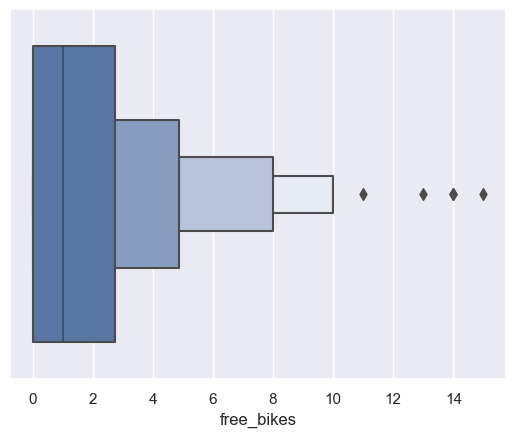

In [36]:
mean_available_bikes = df_bike_stations

sns.boxenplot(x=df_bike_stations["free_bikes"])

plt.savefig("../images/boxplot.png")

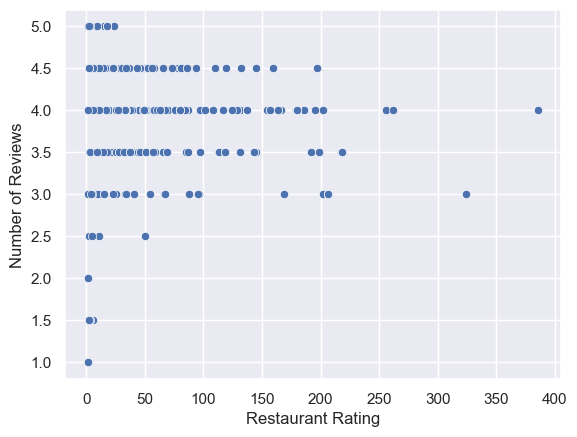

In [37]:
sns.scatterplot(x=df_joined_data["review_count"], y=df_joined_data["rating"])
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Reviews")

plt.savefig("../images/statterplot_rc_rating.png")

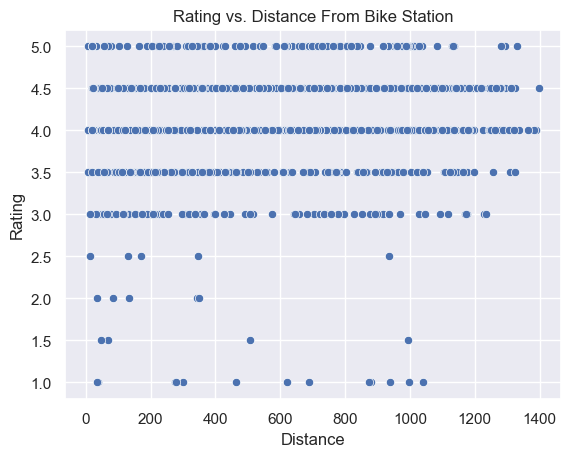

In [38]:
sns.scatterplot(x=df_joined_data["Distance"], y=df_joined_data["rating"])
plt.xlabel("Distance")
plt.ylabel("Rating")
plt.title("Rating vs. Distance From Bike Station")

plt.savefig("../images/statterplot_distance_rating")

# Database

In [ ]:
import sqlite3

from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.